<h1><center>Analysing Date fruit Data</center></h1>

# Problem Statement
* The dataset is having information about geographic locations and other information about date fruit and we have to clean,analyse & visualize the data

<img src="types-of-dates.jpg" alt="Dates Types">

## Abstract
A great number of fruits are grown around the world, each of which has various types. The factors that determine the type of fruit are the external appearance features such as color, length, diameter, and shape. The external appearance of the fruits is a major determinant of the fruit type. Determining the variety of fruits by looking at their external appearance may necessitate expertise, which is time-consuming and requires great effort. The aim of this study is to classify the types of date fruit, that are, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai by using the different machine learning methods. 

<img src="DatesTREE.jpg" alt="dATES TREE">

## Implementation

Libraries:
    * NumPy 
    * pandas 
    * sklearn 
    * Matplotlib 
    * Seaborn

# Dataset Details

## Structure

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')

## Reading the datset

In [2]:
d=pd.read_csv('Date_Fruit_Datasets.csv')
d

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


# Approach

## 1.Data Exploration

In [5]:
d.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [6]:
d.tail()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY
897,343792,2289.2720,823.8438,534.7757,0.7607,661.6113,0.9781,351472,0.6941,1.5405,...,2.5138,3.0369,3.0865,-3.198348e+10,-20482514944,-21219354624,47.3454,38.6966,39.6738,SOGAY


In [8]:
d.sample(5)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
663,314398,2301.7771,901.9976,449.2205,0.8672,632.6958,0.9603,327390,0.7426,2.0079,...,9.4690,10.8600,4.9306,-7.709745e+09,-9247447040,-10501228544,24.4001,26.6255,29.2304,SAFAVI
343,132872,1375.5020,525.5175,322.7784,0.7891,411.3124,0.9906,134127,0.6819,1.6281,...,2.3749,1.8173,1.7672,-2.434372e+10,-24311257088,-17286033408,65.1842,65.8714,55.3698,DOKOL
882,303347,2094.3931,740.3585,525.1052,0.7049,621.4768,0.9735,311603,0.7408,1.4099,...,2.6207,2.1744,2.7457,-4.428148e+10,-36354625536,-40067084288,58.6325,53.7043,56.6222,SOGAY
491,414065,2406.9331,802.0060,662.9860,0.5627,726.0881,0.9866,419708,0.7543,1.2097,...,2.7547,2.6738,3.7012,-6.354824e+10,-50064363520,-51523076096,60.5938,54.0225,55.1423,ROTANA
105,179780,1605.5040,588.5084,390.5041,0.7481,478.4381,0.9890,181785,0.8072,1.5070,...,2.5444,2.3567,2.7728,-2.713227e+10,-22657073152,-19264600064,60.0758,55.5088,51.6330,DEGLET


In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [9]:
d.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [10]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,898.0,2.982952e+05,1.072452e+05,1.987000e+03,2.069480e+05,3.198330e+05,3.825730e+05,5.460630e+05
PERIMETER,898.0,2.057661e+03,4.100125e+02,9.118280e+02,1.726091e+03,2.196345e+03,2.389717e+03,2.811997e+03
MAJOR_AXIS,898.0,7.508120e+02,1.440593e+02,3.367227e+02,6.410686e+02,7.913634e+02,8.586338e+02,1.222723e+03
MINOR_AXIS,898.0,4.958728e+02,1.142689e+02,2.283200e+00,4.046844e+02,4.950548e+02,5.890317e+02,7.664536e+02
ECCENTRICITY,898.0,7.374678e-01,8.872739e-02,3.448000e-01,6.856250e-01,7.547000e-01,8.021500e-01,1.000000e+00
EQDIASQ,898.0,6.045779e+02,1.195939e+02,5.029840e+01,5.133171e+02,6.381409e+02,6.979305e+02,8.338279e+02
SOLIDITY,898.0,9.818403e-01,1.815742e-02,8.366000e-01,9.788250e-01,9.873000e-01,9.918000e-01,9.974000e-01
CONVEX_AREA,898.0,3.038456e+05,1.088157e+05,2.257000e+03,2.100228e+05,3.272070e+05,3.888040e+05,5.525980e+05
EXTENT,898.0,7.362671e-01,5.374518e-02,5.123000e-01,7.058750e-01,7.469500e-01,7.758500e-01,8.562000e-01
ASPECT_RATIO,898.0,2.131102e+00,1.782078e+01,1.065300e+00,1.373725e+00,1.524150e+00,1.674750e+00,5.355257e+02


In [11]:
d.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [14]:
d.shape

(898, 35)

In [15]:
d.dtypes

AREA               int64
PERIMETER        float64
MAJOR_AXIS       float64
MINOR_AXIS       float64
ECCENTRICITY     float64
EQDIASQ          float64
SOLIDITY         float64
CONVEX_AREA        int64
EXTENT           float64
ASPECT_RATIO     float64
ROUNDNESS        float64
COMPACTNESS      float64
SHAPEFACTOR_1    float64
SHAPEFACTOR_2    float64
SHAPEFACTOR_3    float64
SHAPEFACTOR_4    float64
MeanRR           float64
MeanRG           float64
MeanRB           float64
StdDevRR         float64
StdDevRG         float64
StdDevRB         float64
SkewRR           float64
SkewRG           float64
SkewRB           float64
KurtosisRR       float64
KurtosisRG       float64
KurtosisRB       float64
EntropyRR        float64
EntropyRG          int64
EntropyRB          int64
ALLdaub4RR       float64
ALLdaub4RG       float64
ALLdaub4RB       float64
Class             object
dtype: object

## 2.Data cleaning

In [12]:
d.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [13]:
d.duplicated().sum()

0

## 3.Exploratory Data Analaysis

In [31]:
d.nunique()

AREA             897
PERIMETER        898
MAJOR_AXIS       898
MINOR_AXIS       898
ECCENTRICITY     784
EQDIASQ          897
SOLIDITY         343
CONVEX_AREA      898
EXTENT           708
ASPECT_RATIO     859
ROUNDNESS        743
COMPACTNESS      718
SHAPEFACTOR_1     36
SHAPEFACTOR_2     28
SHAPEFACTOR_3    788
SHAPEFACTOR_4    243
MeanRR           897
MeanRG           896
MeanRB           898
StdDevRR         894
StdDevRG         893
StdDevRB         893
SkewRR           884
SkewRG           884
SkewRB           882
KurtosisRR       885
KurtosisRG       888
KurtosisRB       880
EntropyRR        898
EntropyRG        898
EntropyRB        898
ALLdaub4RR       898
ALLdaub4RG       896
ALLdaub4RB       897
Class              7
dtype: int64

In [16]:
d['AREA'].max()

546063

In [17]:
max_area = d['AREA'].max()
d['Class'][(d['AREA']==max_area)]

8    BERHI
Name: Class, dtype: object

In [18]:
n=d.groupby('Class').ASPECT_RATIO.max().sort_values(ascending=False)
n

Class
SAFAVI    535.5257
SOGAY       1.9144
DOKOL       1.8859
DEGLET      1.8384
ROTANA      1.6941
IRAQI       1.5620
BERHI       1.4890
Name: ASPECT_RATIO, dtype: float64

In [19]:
n=d.groupby('Class').ASPECT_RATIO.max().sort_values(ascending=False).head(1)
n

Class
SAFAVI    535.5257
Name: ASPECT_RATIO, dtype: float64

In [20]:
max_kr = d['KurtosisRR'].max()
d['Class'][(d['KurtosisRR']==max_kr)]

737    SAFAVI
Name: Class, dtype: object

In [22]:
d.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [24]:
d.drop(['EntropyRR','EntropyRG','EntropyRB','KurtosisRR','KurtosisRR','MAJOR_AXIS','MINOR_AXIS'],axis=1,inplace=True)

In [25]:
d.drop(['SHAPEFACTOR_2','SHAPEFACTOR_3','StdDevRR','StdDevRG','StdDevRB','SkewRR','SkewRG','SkewRB'],axis=1,inplace=True)

In [26]:
d.drop(['SHAPEFACTOR_4'],axis=1,inplace=True)

In [27]:
d.columns

Index(['AREA', 'PERIMETER', 'ECCENTRICITY', 'EQDIASQ', 'SOLIDITY',
       'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO', 'ROUNDNESS', 'COMPACTNESS',
       'SHAPEFACTOR_1', 'MeanRR', 'MeanRG', 'MeanRB', 'KurtosisRG',
       'KurtosisRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [22]:
d.head(10)

,AREA,PERIMETER,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,MeanRR,MeanRG,MeanRB,KurtosisRG,KurtosisRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,0.0020,117.4466,109.9085,95.6774,2.9574,4.2287,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,0.0021,100.0578,105.6314,95.6610,2.6350,3.1704,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,0.6494,819.0222,0.9962,528876,0.7657,1.3150,0.9446,0.8706,0.0018,130.9558,118.5703,103.8750,3.8611,4.7192,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,0.0020,86.7798,88.2531,82.3751,8.6136,8.2618,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,0.0022,105.5484,101.8132,85.3342,2.9761,4.4146,52.7743,50.9080,42.6666,BERHI
5,408953,2326.6931,0.6722,721.5921,0.9974,410036,0.7805,1.3508,0.9493,0.8589,0.0021,99.3980,90.6346,79.4735,6.0285,6.2159,49.7001,45.3190,39.7371,BERHI
6,451414,2457.2080,0.6796,758.1281,0.9970,452755,0.7877,1.3631,0.9395,0.8525,0.0020,115.6213,117.0903,104.8433,3.4163,4.9168,57.8060,58.5449,52.4199,BERHI
7,382636,2275.7791,0.6569,697.9880,0.9931,385277,0.7032,1.3263,0.9284,0.8638,0.0021,90.3542,96.4854,94.4357,7.0258,5.3254,45.1768,48.2407,47.2167,BERHI
8,546063,2714.9480,0.5481,833.8279,0.9882,552598,0.7710,1.1956,0.9310,0.9099,0.0017,129.2436,119.8232,111.3020,3.7416,4.8120,64.6188,59.9127,55.6509,BERHI
9,420044,2391.1230,0.6370,731.3116,0.9918,423531,0.7853,1.2972,0.9232,0.8738,0.0020,129.8143,116.5492,96.9639,4.2898,5.4637,64.9094,58.2771,48.4820,BERHI


## Data Visualization 

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64


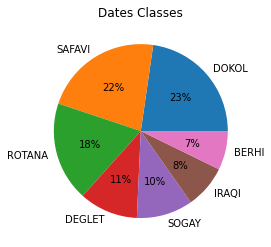

In [28]:
classes=d['Class'].value_counts()
print(classes)
plt.pie(classes,labels=['DOKOL','SAFAVI','ROTANA','DEGLET','SOGAY','IRAQI','BERHI'],autopct='%.0f%%')
plt.title('Dates Classes')
plt.show()

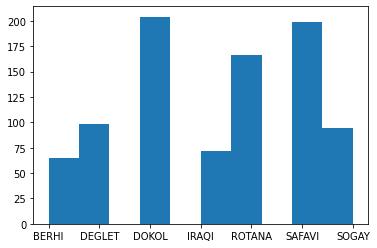

In [42]:
plt.hist(d["Class"])
plt.show()

## Applying Machine learning techniques

Splitting the data
* test_size = 0.25 so that data is split into 75% and 25%
* random_state is applied so that each time we run we get the same result
* Target is Dates classes.
* Features 
       'AREA', 'PERIMETER', 'ECCENTRICITY', 'EQDIASQ', 'SOLIDITY',
       'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO', 'ROUNDNESS', 'COMPACTNESS',
       'SHAPEFACTOR_1', 'MeanRR', 'MeanRG', 'MeanRB', 'KurtosisRG',
       'KurtosisRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB'

In [36]:
x=d.drop(['Class'],axis=1)
y=d['Class']

In [37]:
x

,AREA,PERIMETER,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,MeanRR,MeanRG,MeanRB,KurtosisRG,KurtosisRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.9080,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,0.0020,117.4466,109.9085,95.6774,2.9574,4.2287,58.7255,54.9554,47.8400
1,338136,2085.1440,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,0.0021,100.0578,105.6314,95.6610,2.6350,3.1704,50.0259,52.8168,47.8315
2,526843,2647.3940,0.6494,819.0222,0.9962,528876,0.7657,1.3150,0.9446,0.8706,0.0018,130.9558,118.5703,103.8750,3.8611,4.7192,65.4772,59.2860,51.9378
3,416063,2351.2100,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,0.0020,86.7798,88.2531,82.3751,8.6136,8.2618,43.3900,44.1259,41.1882
4,347562,2160.3540,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,0.0022,105.5484,101.8132,85.3342,2.9761,4.4146,52.7743,50.9080,42.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,0.7241,570.2536,0.9785,261028,0.7269,1.4499,0.8658,0.8243,0.0027,98.1696,86.0790,84.8254,2.3704,2.7202,49.0869,43.0422,42.4153
894,365924,2664.8230,0.7644,682.5752,0.9466,386566,0.6695,1.5510,0.6475,0.7979,0.0023,93.6238,78.2098,73.1009,3.5805,3.9910,46.8086,39.1046,36.5502
895,254330,1926.7360,0.8126,569.0545,0.9925,256255,0.7240,1.7159,0.8609,0.7613,0.0029,88.2526,81.5870,81.9449,2.5090,2.6951,44.1325,40.7986,40.9769
896,238955,1906.2679,0.7873,551.5859,0.9604,248795,0.6954,1.6220,0.8263,0.7697,0.0030,102.4622,91.4354,91.2533,2.6874,2.7991,51.2267,45.7162,45.6260


In [38]:
y

0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=27)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(673, 19)
(225, 19)
(673,)
(225,)


## ML Approaches
* Logistic Regression
* KNN
* Random Forest Classifier
* Decision Tree Classifier
* Naive Bayes Classifier
* AdaBoost Classifier

In [61]:
def model_create(model, x_train, y_train, x_test, y_test):
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy = {}".format(accuracy))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, x_test, y_test,cmap=plt.cm.pink, normalize = 'all',)                 
    return model, accuracy

## 1. Logistic Regression 

Accuracy = 0.6133333333333333
              precision    recall  f1-score   support

       BERHI    0.36364   0.33333   0.34783        12
      DEGLET    0.00000   0.00000   0.00000        31
       DOKOL    0.74026   0.98276   0.84444        58
       IRAQI    0.31250   0.27778   0.29412        18
      ROTANA    0.68000   0.73913   0.70833        46
      SAFAVI    0.53521   0.88372   0.66667        43
       SOGAY    0.00000   0.00000   0.00000        17

    accuracy                        0.61333       225
   macro avg    0.37594   0.45953   0.40877       225
weighted avg    0.47652   0.61333   0.53198       225



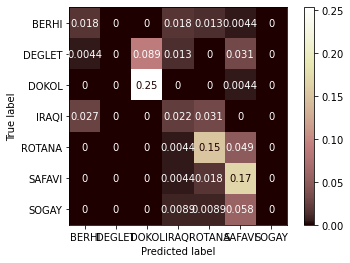

In [62]:
model_LR=LogisticRegression()
model_LR, accuracy_LR = model_create(model_LR, x_train, y_train, x_test, y_test)

## 2. Decision Tree

Accuracy = 0.8577777777777778
              precision    recall  f1-score   support

       BERHI    0.90000   0.75000   0.81818        12
      DEGLET    0.70000   0.67742   0.68852        31
       DOKOL    0.92982   0.91379   0.92174        58
       IRAQI    0.92857   0.72222   0.81250        18
      ROTANA    0.93750   0.97826   0.95745        46
      SAFAVI    0.91304   0.97674   0.94382        43
       SOGAY    0.50000   0.58824   0.54054        17

    accuracy                        0.85778       225
   macro avg    0.82985   0.80095   0.81182       225
weighted avg    0.86236   0.85778   0.85806       225



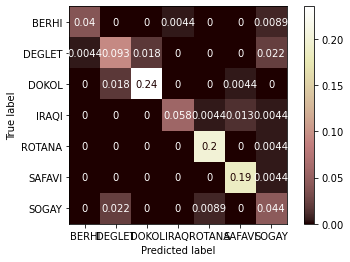

In [47]:
model_DC=DecisionTreeClassifier()
model_DC, accuracy_DC = model_create(model_DC, x_train, y_train, x_test, y_test)

## 3.Random Forest:

Accuracy = 0.8933333333333333
              precision    recall  f1-score   support

       BERHI    0.88889   0.66667   0.76190        12
      DEGLET    0.75862   0.70968   0.73333        31
       DOKOL    0.94643   0.91379   0.92982        58
       IRAQI    0.94444   0.94444   0.94444        18
      ROTANA    1.00000   0.97826   0.98901        46
      SAFAVI    0.97674   0.97674   0.97674        43
       SOGAY    0.56000   0.82353   0.66667        17

    accuracy                        0.89333       225
   macro avg    0.86788   0.85902   0.85742       225
weighted avg    0.90487   0.89333   0.89615       225



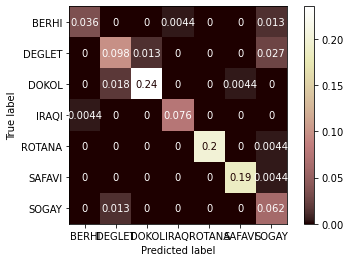

In [48]:
model_RF=RandomForestClassifier()
model_RF, accuracy_RF= model_create(model_RF, x_train, y_train, x_test, y_test)

## 4. Naive Bayes Classifier:

Accuracy = 0.8266666666666667
              precision    recall  f1-score   support

       BERHI    0.44444   0.33333   0.38095        12
      DEGLET    0.65625   0.67742   0.66667        31
       DOKOL    0.94643   0.91379   0.92982        58
       IRAQI    0.88235   0.83333   0.85714        18
      ROTANA    0.91489   0.93478   0.92473        46
      SAFAVI    0.93333   0.97674   0.95455        43
       SOGAY    0.42105   0.47059   0.44444        17

    accuracy                        0.82667       225
   macro avg    0.74268   0.73428   0.73690       225
weighted avg    0.82591   0.82667   0.82549       225



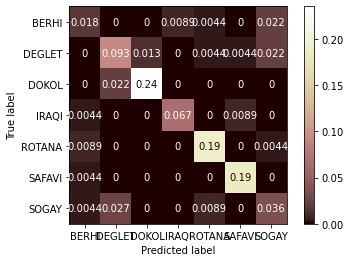

In [49]:
model_NB=GaussianNB()
model_NB, accuracy_NB = model_create(model_NB, x_train, y_train, x_test, y_test)

## 5. K-Nearest Neighbors

Accuracy = 0.6133333333333333
              precision    recall  f1-score   support

       BERHI    0.15789   0.25000   0.19355        12
      DEGLET    0.73333   0.70968   0.72131        31
       DOKOL    0.94643   0.91379   0.92982        58
       IRAQI    0.63636   0.38889   0.48276        18
      ROTANA    0.56522   0.56522   0.56522        46
      SAFAVI    0.44000   0.51163   0.47312        43
       SOGAY    0.38462   0.29412   0.33333        17

    accuracy                        0.61333       225
   macro avg    0.55198   0.51905   0.52844       225
weighted avg    0.63304   0.61333   0.61917       225



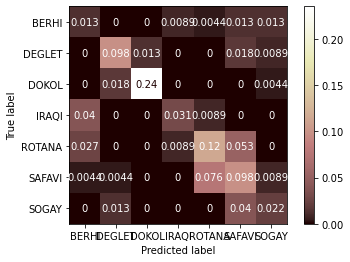

In [51]:
model_KNN=KNeighborsClassifier(n_neighbors=5)
model_KNN, accuracy_KNN = model_create(model_KNN, x_train, y_train, x_test, y_test)

## 6.AdaBoostClassifier

Accuracy = 0.47555555555555556
              precision    recall  f1-score   support

       BERHI    0.00000   0.00000   0.00000        12
      DEGLET    0.00000   0.00000   0.00000        31
       DOKOL    0.00000   0.00000   0.00000        58
       IRAQI    0.76923   0.55556   0.64516        18
      ROTANA    0.68852   0.91304   0.78505        46
      SAFAVI    0.97500   0.90698   0.93976        43
       SOGAY    0.14414   0.94118   0.25000        17

    accuracy                        0.47556       225
   macro avg    0.36813   0.47382   0.37428       225
weighted avg    0.39953   0.47556   0.41060       225



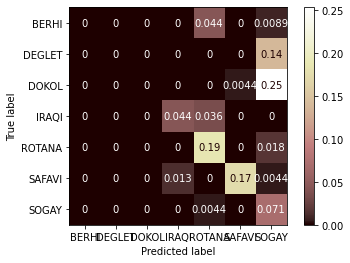

In [53]:
model_AB=AdaBoostClassifier(n_estimators=50,learning_rate=1)
model_AB, accuracy_AB = model_create(model_AB, x_train, y_train, x_test, y_test)


## Comparison of accuracies

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
    
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>61%</td>
    
  </tr>
  <tr>
    <td>Decision Tree Classifier</td>
    <td>85%</td>
    
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>89%</td>
    
  </tr>
  <tr>
    <td>Naive Bayes</td>
    <td>82%</td>
    
  </tr>
  <tr>
    <td>KNN</td>
    <td>61%</td>
    
  </tr>
  <tr>
    <td>ADA Boost</td>
    <td>47%</td>
    
  </tr>
    
</table>

## Conclusion:
#### On comparison we could see that Random Forest is the best from among the models trained to predict the accurate result with an accuracy of 89% 